# AOS1 - TP1 by Carvalho Philippe and Huong-Parrain Anathan 

### Load libraries that we need

In [24]:
import scipy.io as sio
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load provided data

In [25]:
dataFile = "Urban_R162.mat"
data = sio.loadmat(dataFile)

#We extract the matrix that represents the hyperspectral image
image = data['Y']

#We get the dimensions of the image
nCol = int(data['nCol'])
nRow = int(data['nRow'])

### Data centering

In [26]:
#centering to prepare data for PCA

scaler = pre.StandardScaler()
centeredImg = scaler.fit_transform(image)

### Application of PCA on image

In [27]:
#We apply PCA on the channels in order to maximize variance on as few channels as possible
pca = PCA()
pca_res = pca.fit(centeredImg)

### Visualization of PCA as graphs

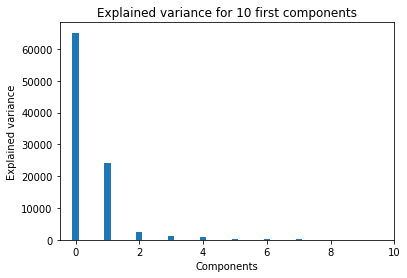

In [28]:
#Obtain the explained variances for each component
plt.figure()

plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_, width=0.2)
plt.title("Explained variance for 10 first components")
plt.xlabel("Components")
plt.ylabel("Explained variance")

#We choose to display only the first 10 components as they hold almost all of the explained variance
axes = plt.gca()
axes.set_xlim([-0.5,10])

plt.show()

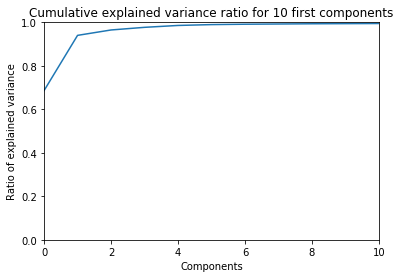

Ratio of explained variances of 10 first components:
[0.68633384 0.94018012 0.96498277 0.97712326 0.98577748 0.98969731
 0.99145959 0.9926219  0.9935348  0.99421778]


In [29]:
#Obtain the cumulative explained variance ratio

plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative explained variance ratio for 10 first components")
plt.xlabel("Components")
plt.ylabel("Ratio of explained variance")

axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,1])

plt.show()

#Actual values of ratio of explained variances for 10 first components
print("Ratio of explained variances of 10 first components:")
print(np.cumsum(pca.explained_variance_ratio_)[0:10])

We can use the three first components as the three colors we will use for the representation. They should hold (depending on the data) the majority of the variance and will thus display most relevant details present in the original image. If they do not however, the algorithm will produce an image that will be hardly interpretable.

### Construction of the reducted image

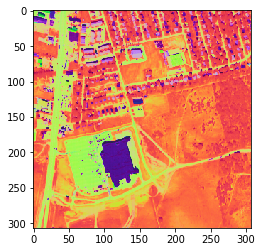

In [30]:
#We store the 3 first principal components into "new_img"
new_img = pca_res.components_[0:3]
    
#The values obtained are scaled between 0 and 1
scaler = MinMaxScaler((0,1))
imgToReshape = scaler.fit_transform(new_img.transpose()) #image transposed to rescale according to features, not dimensions

#We use reshape to have the right dimensions for the final image 
final_img = imgToReshape.reshape((nCol, nRow, -1))
 
#Display the final image
plt.imshow(final_img)